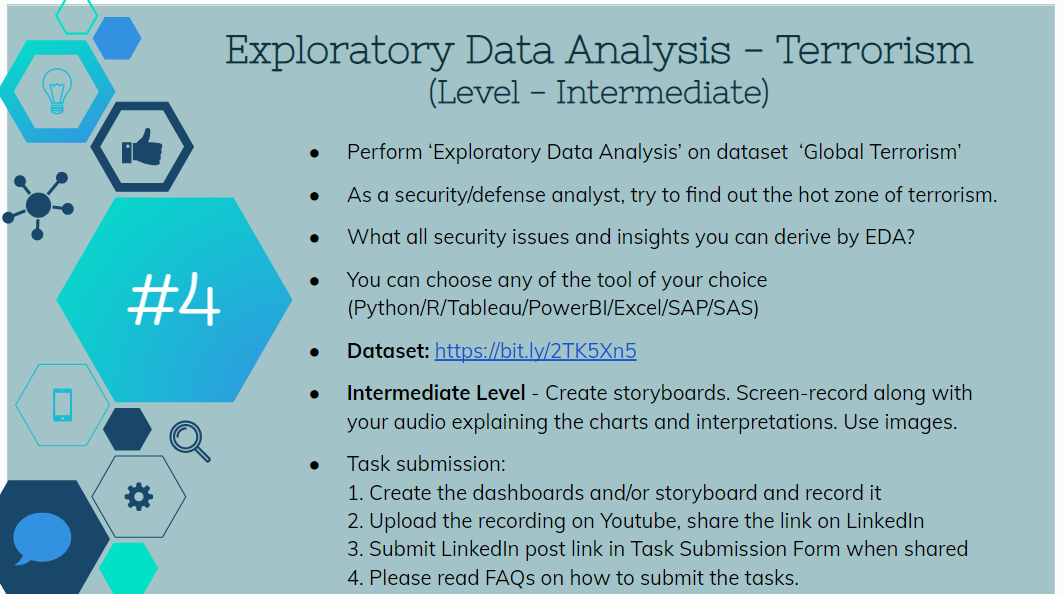

In [2]:
import pandas as pd

In [3]:
#d = pd.read_csv("globalterrorismdb.csv")

In [4]:
import chardet

with open("globalterrorismdb.csv", 'rb') as file:
    result = chardet.detect(file.read(10000))  # Read the first 10,000 bytes
    encoding = result['encoding']

# Use the detected encoding to read the CSV file
d = pd.read_csv("globalterrorismdb.csv", encoding=encoding)


C:\Users\rohan\AppData\Local\Temp\ipykernel_13240\1422947825.py:8: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("globalterrorismdb.csv", encoding=encoding)


In [5]:
d.shape

(181691, 135)

In [6]:
d.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

- Data is from 1970 to 2017

In [7]:
d.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
d.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [9]:
# Attacks by Year
d['iyear'].value_counts()
# find top 10 most and least

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [10]:
# Number of attacks in chronological order

In [11]:
# Attacks by Country
# Note: Run the 3 steps in sequence and do not run Step 2 or 3 more than once after running step 1. It will cause errors.
# Step 1: Count the number of occurence of each country in the country column
x = d["country_txt"].value_counts()
# x is a Python series. Converting the series into a Python Pandas DataFrame
x_df = x.to_frame()
x_df.head(10)

,country_txt
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


In [12]:
# Step 2 : Reset the index to convert it to a column
x_df.reset_index(inplace=True)
x_df.head()

,index,country_txt
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [13]:
# Step 3 : Rename the columns.
#x_df.index.rename('country_name', inplace=True)
x_df.columns = ['country_name','attacks']
x_df.head(10)

,country_name,attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [14]:
# Attacks by Region
d["region_txt"].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [26]:
# Attacks by Attack type 1
d["attacktype1_txt"].value_counts()
attacktype_df = d['attacktype1_txt'].value_counts().to_frame()
attacktype_df.reset_index(inplace=True)
attacktype_df.columns = ['attack type', 'attacks']


total = attacktype_df['attacks'].sum()
attacktype_df['percentage'] = (attacktype_df['attacks'] / total) * 100
attacktype_df

,attack type,attacks,percentage
0,Bombing/Explosion,88255,48.574228
1,Armed Assault,42669,23.484377
2,Assassination,19312,10.629035
3,Hostage Taking (Kidnapping),11158,6.141196
4,Facility/Infrastructure Attack,10356,5.699787
5,Unknown,7276,4.004601
6,Unarmed Assault,1015,0.558641
7,Hostage Taking (Barricade Incident),991,0.545432
8,Hijacking,659,0.362704


In [16]:
# Target Type
d["targtype1_txt"].value_counts()
# Store cities with most attacks in descending order into a new pd Dataframe
target_df=d["targtype1_txt"].value_counts().to_frame()
# Reset index
target_df.reset_index(inplace=True)
# rename the columns
target_df.columns = ['target', 'attacks']
# print the top 10 cities with most attacks
#city_df.head(10)
# Store it into a csv file
#city_df.to_csv('cityWiseAttacks.csv')
#city_df.shape

# Calculate the sum of all numbers in the 'numbers' column
total = target_df['attacks'].sum()
# Create a new column 'percentage' with the percentage of each number
target_df['percentage'] = (target_df['attacks'] / total) * 100

# If you want to round the percentages to a specific number of decimal places, e.g., 2:
target_df['percentage'] = target_df['percentage'].round(2)

# Display the first few rows of the updated DataFrame to verify
print(target_df.head(20))

                            target  attacks  percentage
0      Private Citizens & Property    43511       23.95
1                         Military    27984       15.40
2                           Police    24506       13.49
3             Government (General)    21283       11.71
4                         Business    20669       11.38
5                   Transportation     6799        3.74
6                        Utilities     6023        3.31
7                          Unknown     5898        3.25
8   Religious Figures/Institutions     4440        2.44
9          Educational Institution     4322        2.38
10         Government (Diplomatic)     3573        1.97
11    Terrorists/Non-State Militia     3039        1.67
12             Journalists & Media     2948        1.62
13         Violent Political Party     1866        1.03
14             Airports & Aircraft     1343        0.74
15               Telecommunication     1009        0.56
16                             NGO      970     

In [17]:
# Attacks by Weapon type.
d["weaptype1_txt"].value_counts()
# Store cities with most attacks in descending order into a new pd Dataframe
weapon_df=d["weaptype1_txt"].value_counts().to_frame()
# Reset index
weapon_df.reset_index(inplace=True)
# rename the columns
weapon_df.columns = ['weapon type', 'numbers']
# print the top 10 cities with most attacks
weapon_df.head(10)
# Store it into a csv file
#city_df.to_csv('cityWiseAttacks.csv')

#### CODE TO CALCULATE the absolue numbers in percentage
# Calculate the sum of all numbers in the 'numbers' column
total = weapon_df['numbers'].sum()


# Create a new column 'percentage' with the percentage of each number
weapon_df['percentage'] = (weapon_df['numbers'] / total) * 100

# If you want to round the percentages to a specific number of decimal places, e.g., 2:
weapon_df['percentage'] = weapon_df['percentage'].round(2)

# Display the first few rows of the updated DataFrame to verify
print(weapon_df.head(20))

                                          weapon type  numbers  percentage
0                                          Explosives    92426       50.87
1                                            Firearms    58524       32.21
2                                             Unknown    15157        8.34
3                                          Incendiary    11135        6.13
4                                               Melee     3655        2.01
5                                            Chemical      321        0.18
6                                  Sabotage Equipment      141        0.08
7   Vehicle (not to include vehicle-borne explosiv...      136        0.07
8                                               Other      114        0.06
9                                          Biological       35        0.02
10                                       Fake Weapons       33        0.02
11                                       Radiological       14        0.01


In [18]:
# Cities with the most terrorist attacks

# Store cities with most attacks in descending order into a new pd Dataframe
city_df=d["city"].value_counts().to_frame()
# Reset index
city_df.reset_index(inplace=True)
# rename the columns
city_df.columns = ['city', 'attacks']
# print the top 10 cities with most attacks
city_df.head(10)
# Store it into a csv file
#city_df.to_csv('cityWiseAttacks.csv')
city_df.shape

# Calculate the sum of all numbers in the 'numbers' column
total = city_df['attacks'].sum()


# Create a new column 'percentage' with the percentage of each number
city_df['percentage'] = (city_df['attacks'] / total) * 100

# If you want to round the percentages to a specific number of decimal places, e.g., 2:
city_df['percentage'] = city_df['percentage'].round(2)

# Display the first few rows of the updated DataFrame to verify
print(city_df.head(20))

              city  attacks  percentage
0          Unknown     9775        5.39
1          Baghdad     7589        4.19
2          Karachi     2652        1.46
3             Lima     2359        1.30
4            Mosul     2265        1.25
5          Belfast     2171        1.20
6         Santiago     1621        0.89
7        Mogadishu     1581        0.87
8     San Salvador     1558        0.86
9         Istanbul     1048        0.58
10          Athens     1019        0.56
11          Bogota      984        0.54
12          Kirkuk      925        0.51
13          Beirut      918        0.51
14        Medellin      848        0.47
15        Benghazi      840        0.46
16        Peshawar      819        0.45
17          Quetta      803        0.44
18  Guatemala City      755        0.42
19         Baqubah      745        0.41


In [19]:
# Select only the required columns from the 'd' dataframe
d_subset = d[['city', 'latitude', 'longitude']]
d_subset.isnull().sum()
# Remove rows with null values in specific columns
d_subset = d_subset.dropna(subset= ['city', 'latitude', 'longitude'])

# Remove rows only if all values are null
#df = df.dropna(how='all')

In [20]:
import numpy as np


# Merge the two dataframes on the "city" column
result_df = pd.merge(city_df, d_subset, on='city', how='inner')
# Remove rows where the city name is "Unknown"
result_df = result_df[result_df['city'] != 'Unknown']
# Remove rows containing null (NaN) or infinite (inf) values in latitude and longitude columns
result_df = result_df[np.isfinite(result_df['latitude']) & np.isfinite(result_df['longitude'])]

# Round off "latitude" and "longitude" numbers to the nearest integers
result_df['latitude'] = result_df['latitude'].round().astype(int)
result_df['longitude'] = result_df['longitude'].round().astype(int)
# Remove duplicate rows
result_df = result_df.drop_duplicates()
result_df.head()
#result_df.shape

,city,attacks,percentage,latitude,longitude
7534,Baghdad,7589,4.19,33,44
7761,Baghdad,7589,4.19,33,45
12499,Baghdad,7589,4.19,34,44
12877,Baghdad,7589,4.19,31,34
15123,Karachi,2652,1.46,25,67


In [21]:
import folium

In [22]:
'''
import pandas as pd
import folium

# Assuming you have a DataFrame called 'result_df' with 'latitude', 'longitude', and 'city' columns
# If you need to load the data:
# result_df = pd.read_csv('your_data_file.csv')

# Create a map centered on the mean latitude and longitude
center_lat = result_df['latitude'].mean()
center_lon = result_df['longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add markers for each city
for idx, row in result_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['city'],
        tooltip=row['city']
    ).add_to(map)

# Save the map to an HTML file
map.save("city_map.html")

print("Map has been saved as 'city_map.html'. Open this file in a web browser to view the map.")
'''

'\nimport pandas as pd\nimport folium\n\n# Assuming you have a DataFrame called \'result_df\' with \'latitude\', \'longitude\', and \'city\' columns\n# If you need to load the data:\n# result_df = pd.read_csv(\'your_data_file.csv\')\n\n# Create a map centered on the mean latitude and longitude\ncenter_lat = result_df[\'latitude\'].mean()\ncenter_lon = result_df[\'longitude\'].mean()\nmap = folium.Map(location=[center_lat, center_lon], zoom_start=6)\n\n# Add markers for each city\nfor idx, row in result_df.iterrows():\n    folium.Marker(\n        location=[row[\'latitude\'], row[\'longitude\']],\n        popup=row[\'city\'],\n        tooltip=row[\'city\']\n    ).add_to(map)\n\n# Save the map to an HTML file\nmap.save("city_map.html")\n\nprint("Map has been saved as \'city_map.html\'. Open this file in a web browser to view the map.")\n'

In [23]:
# Groups that have meade the most number of attacks
d['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

In [24]:
# Store cities with most attacks in descending order into a new pd Dataframe
terroristGroups_df=d["gname"].value_counts().to_frame()
# Reset index
terroristGroups_df.reset_index(inplace=True)
# rename the columns
terroristGroups_df.columns = ['terrorist group', 'no. of attacks']
# print the top 10 cities with most attacks
print(terroristGroups_df.head(10))
# Store it into a csv file
#city_df.to_csv('cityWiseAttacks.csv')
#city_df.shape

                                    terrorist group  no. of attacks
0                                           Unknown           82782
1                                           Taliban            7478
2       Islamic State of Iraq and the Levant (ISIL)            5613
3                                 Shining Path (SL)            4555
4  Farabundo Marti National Liberation Front (FMLN)            3351
5                                        Al-Shabaab            3288
6                           New People's Army (NPA)            2772
7                       Irish Republican Army (IRA)            2671
8     Revolutionary Armed Forces of Colombia (FARC)            2487
9                                        Boko Haram            2418


### NEXT
- Try some correlation analysis